In [1]:
import json
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import MultiLabelBinarizer

import networkx as nx

from collections import Counter
from nltk.util import ngrams 

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
def read_json(filename):
    with open(filename) as f:
        return json.load(f)

In [4]:
normas = read_json("normas_80assuntos_processadas.json")

In [5]:
corpus = [norma['TextoPreProcessado'] for norma in normas]
labels = [norma['AssuntoGeral'] for norma in normas]

In [6]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)

## Distribuição de labels

In [7]:
c = Counter(tuple(item) for item in labels)
c.most_common(20)

[(('IMÓVEL',), 2001),
 (('CRÉDITO',), 1450),
 (('TRIBUTOS',), 446),
 (('ESTABELECIMENTO DE ENSINO',
   'PESSOAL',
   'SECRETARIA DE ESTADO DE EDUCAÇÃO (SEE)'),
  407),
 (('DIVISÃO ADMINISTRATIVA',), 338),
 (('PESSOAL', 'EXECUTIVO'), 203),
 (('AUXÍLIO FINANCEIRO',), 175),
 (('TRANSPORTE E TRÂNSITO',), 165),
 (('ORÇAMENTO', 'ADMINISTRAÇÃO ESTADUAL'), 148),
 (('BENEFÍCIO PESSOAL',), 148),
 (('HOMENAGEM',), 136),
 (('FINANÇAS PÚBLICAS',), 126),
 (('ORGANIZAÇÃO ADMINISTRATIVA', 'PESSOAL'), 122),
 (('FUNDO ESTADUAL',), 104),
 (('ESTABELECIMENTO DE ENSINO',), 100),
 (('ORGANIZAÇÃO ADMINISTRATIVA',), 94),
 (('MEIO AMBIENTE',), 87),
 (('ENSINO SUPERIOR',), 85),
 (('ADMINISTRAÇÃO INDIRETA',), 80),
 (('SAÚDE PÚBLICA',), 76)]

<BarContainer object of 8 artists>

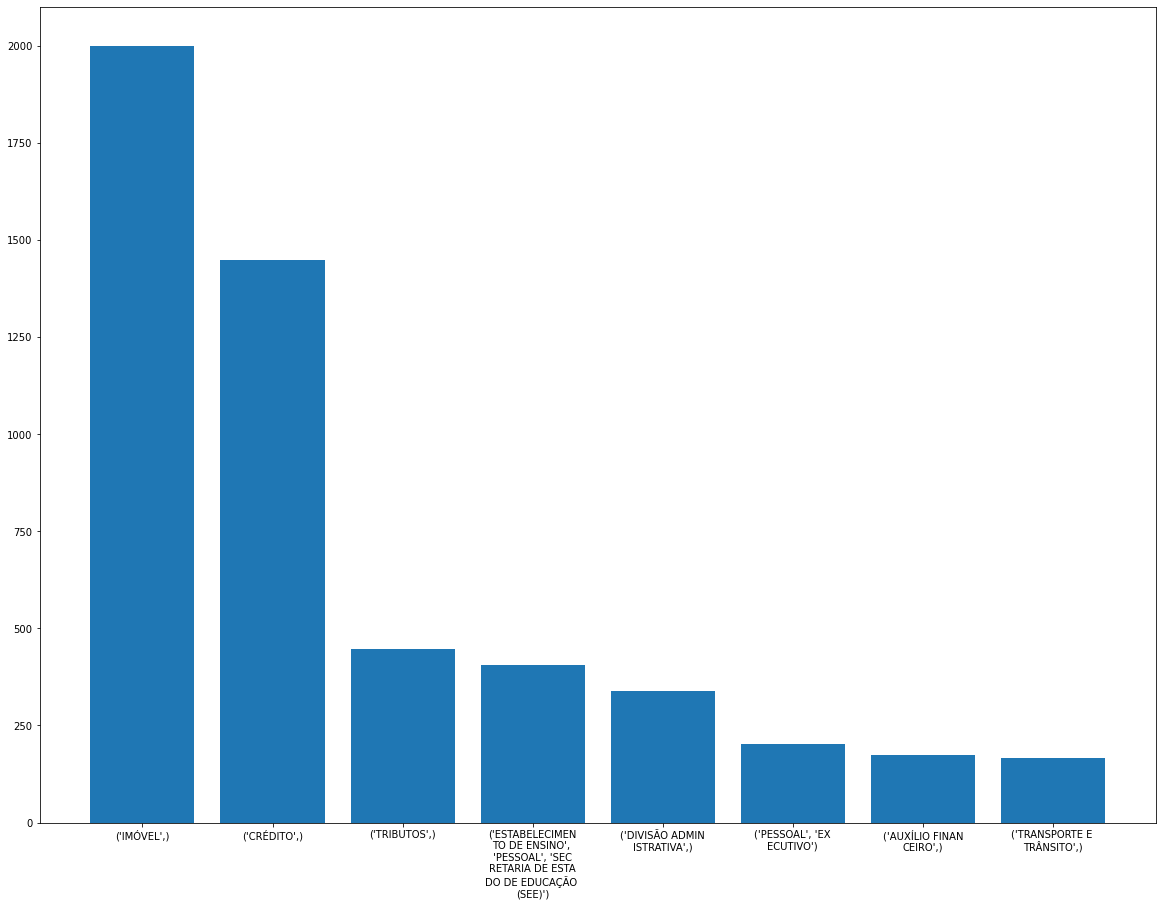

In [9]:
import matplotlib.pyplot as plt
import re
plt.xticks(fontsize = 10) 
xlabels = [str(x[0]) for x in c.most_common(8)]
ylabels = [x[1] for x in c.most_common(8)]
xlabels_new = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
plt.bar(xlabels_new, ylabels)

In [8]:
c = Counter()
for text in corpus:
    c.update(ngrams(text.split(), 1))

print(len(c))
c.most_common(20)

57293


[(('cr',), 97941),
 (('lei',), 70448),
 (('estado',), 59146),
 (('minas',), 34151),
 (('gerais',), 29654),
 (('dezembro',), 24698),
 (('despesas',), 22329),
 (('municipio',), 20987),
 (('secretaria',), 20703),
 (('escolar',), 18906),
 (('desta',), 17916),
 (('artigo',), 17535),
 (('jose',), 16482),
 (('estadual',), 15666),
 (('seguinte',), 15406),
 (('belo',), 14936),
 (('fica',), 14434),
 (('paragrafo',), 14319),
 (('horizonte',), 14257),
 (('inciso',), 14062)]

In [9]:
len([x for x in c.items() if x[1] <= 1])

19919

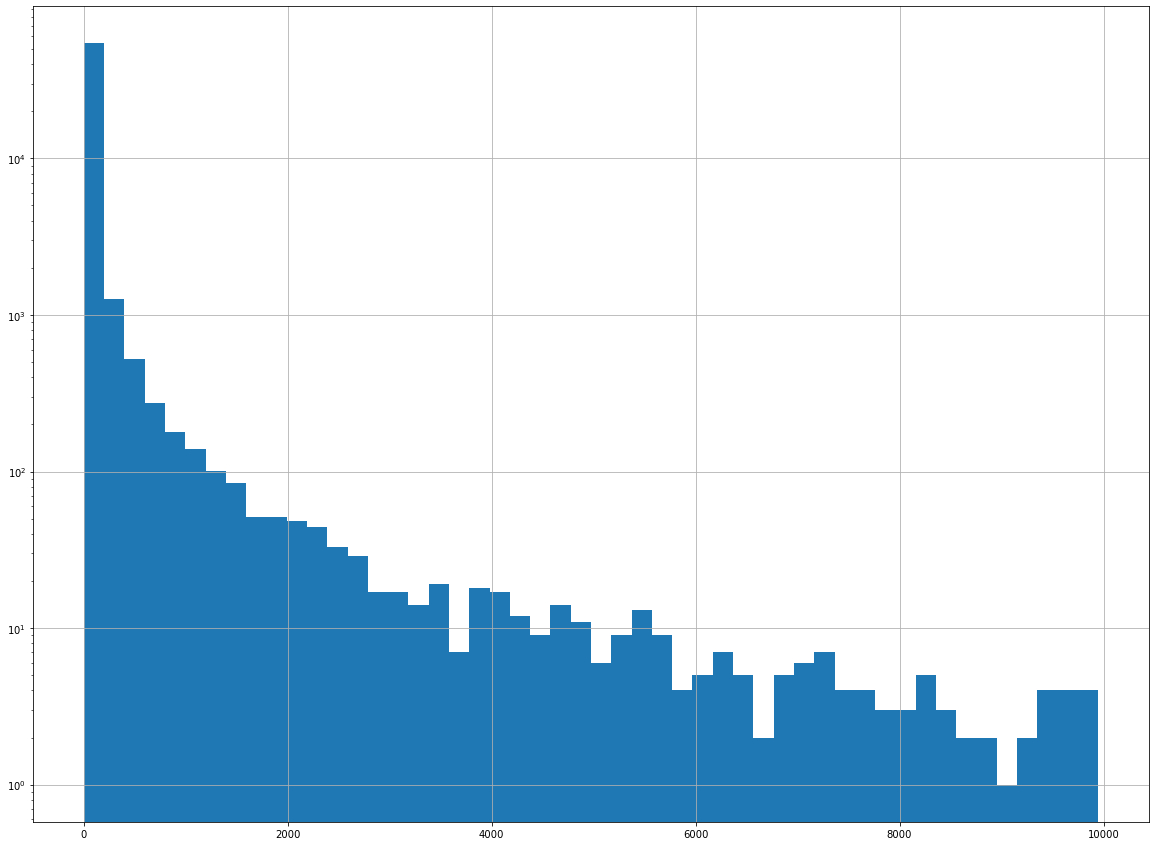

In [10]:
df = pd.DataFrame.from_dict(c, orient='index').reset_index().sort_values(by=0, ascending=False).reset_index()
fig, ax = plt.subplots()
df[df[0]<10000][0].hist(bins=50)
ax.set_yscale('log')

In [11]:
c = Counter()
for text in corpus:
    c.update(ngrams(text.split(), 2))

c.most_common(20)

[(('minas', 'gerais'), 27757),
 (('estado', 'minas'), 20207),
 (('desta', 'lei'), 15831),
 (('belo', 'horizonte'), 14203),
 (('paragrafo', 'unico'), 13125),
 (('secretaria', 'estado'), 12016),
 (('data', 'publicacao'), 10907),
 (('poder', 'executivo'), 10546),
 (('vicente', 'paulo'), 10245),
 (('seguinte', 'lei'), 9539),
 (('gerais', 'representantes'), 9271),
 (('vigor', 'data'), 9226),
 (('povo', 'estado'), 9209),
 (('dezembro', 'cr'), 9149),
 (('representantes', 'decretou'), 9092),
 (('decretou', 'nome'), 8918),
 (('caixa', 'escolar'), 8643),
 (('grupo', 'escolar'), 8535),
 (('palacio', 'liberdade'), 7778),
 (('liberdade', 'belo'), 7740)]

## Cria grafo de labels

In [12]:
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)

edge_map = graph_builder.transform(y)

print("{} labels, {} edges".format(len(mlb.classes_), len(edge_map)))
display(edge_map)

80 labels, 988 edges


{(11, 17): 5.0,
 (11, 31): 2.0,
 (17, 31): 3.0,
 (11, 57): 11.0,
 (17, 57): 2.0,
 (31, 57): 394.0,
 (11, 63): 44.0,
 (17, 63): 5.0,
 (31, 63): 4.0,
 (57, 63): 17.0,
 (0, 34): 1.0,
 (0, 41): 7.0,
 (34, 41): 3.0,
 (0, 51): 2.0,
 (34, 51): 6.0,
 (41, 51): 7.0,
 (0, 57): 117.0,
 (34, 57): 5.0,
 (41, 57): 18.0,
 (51, 57): 277.0,
 (0, 16): 32.0,
 (16, 57): 37.0,
 (0, 53): 160.0,
 (4, 11): 4.0,
 (4, 14): 1.0,
 (11, 14): 5.0,
 (4, 17): 2.0,
 (14, 17): 1.0,
 (4, 21): 2.0,
 (11, 21): 2.0,
 (14, 21): 1.0,
 (17, 21): 1.0,
 (4, 22): 6.0,
 (11, 22): 3.0,
 (14, 22): 3.0,
 (17, 22): 2.0,
 (21, 22): 2.0,
 (4, 27): 5.0,
 (11, 27): 2.0,
 (14, 27): 1.0,
 (17, 27): 2.0,
 (21, 27): 2.0,
 (22, 27): 5.0,
 (4, 40): 3.0,
 (11, 40): 6.0,
 (14, 40): 1.0,
 (17, 40): 1.0,
 (21, 40): 1.0,
 (22, 40): 3.0,
 (27, 40): 2.0,
 (4, 50): 7.0,
 (11, 50): 7.0,
 (14, 50): 3.0,
 (17, 50): 1.0,
 (21, 50): 1.0,
 (22, 50): 3.0,
 (27, 50): 1.0,
 (40, 50): 7.0,
 (4, 63): 7.0,
 (14, 63): 6.0,
 (21, 63): 4.0,
 (22, 63): 2.0,
 (27, 63)

## Grafo usando NetworkX

In [13]:
# Função helper:
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }

In [14]:
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [15]:
partition = clusterer.fit_predict(None, y)
partition

array([list([0, 6, 16, 26, 44, 45, 53]),
       list([1, 3, 23, 30, 31, 33, 41, 51, 54, 57, 64, 65, 66, 67]),
       list([2, 4, 5, 7, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 22, 24, 25, 27, 28, 29, 32, 34, 35, 36, 37, 38, 39, 40, 47, 49, 50, 55, 56, 61, 62, 63, 68, 69, 70, 71, 72, 73, 78, 79]),
       list([10, 19, 58, 59, 60]),
       list([13, 42, 43, 46, 48, 52, 74, 75, 76, 77])], dtype=object)

In [16]:
membership_vector = to_membership_vector(partition)

In [17]:
names_dict = dict(enumerate(mlb.classes_))

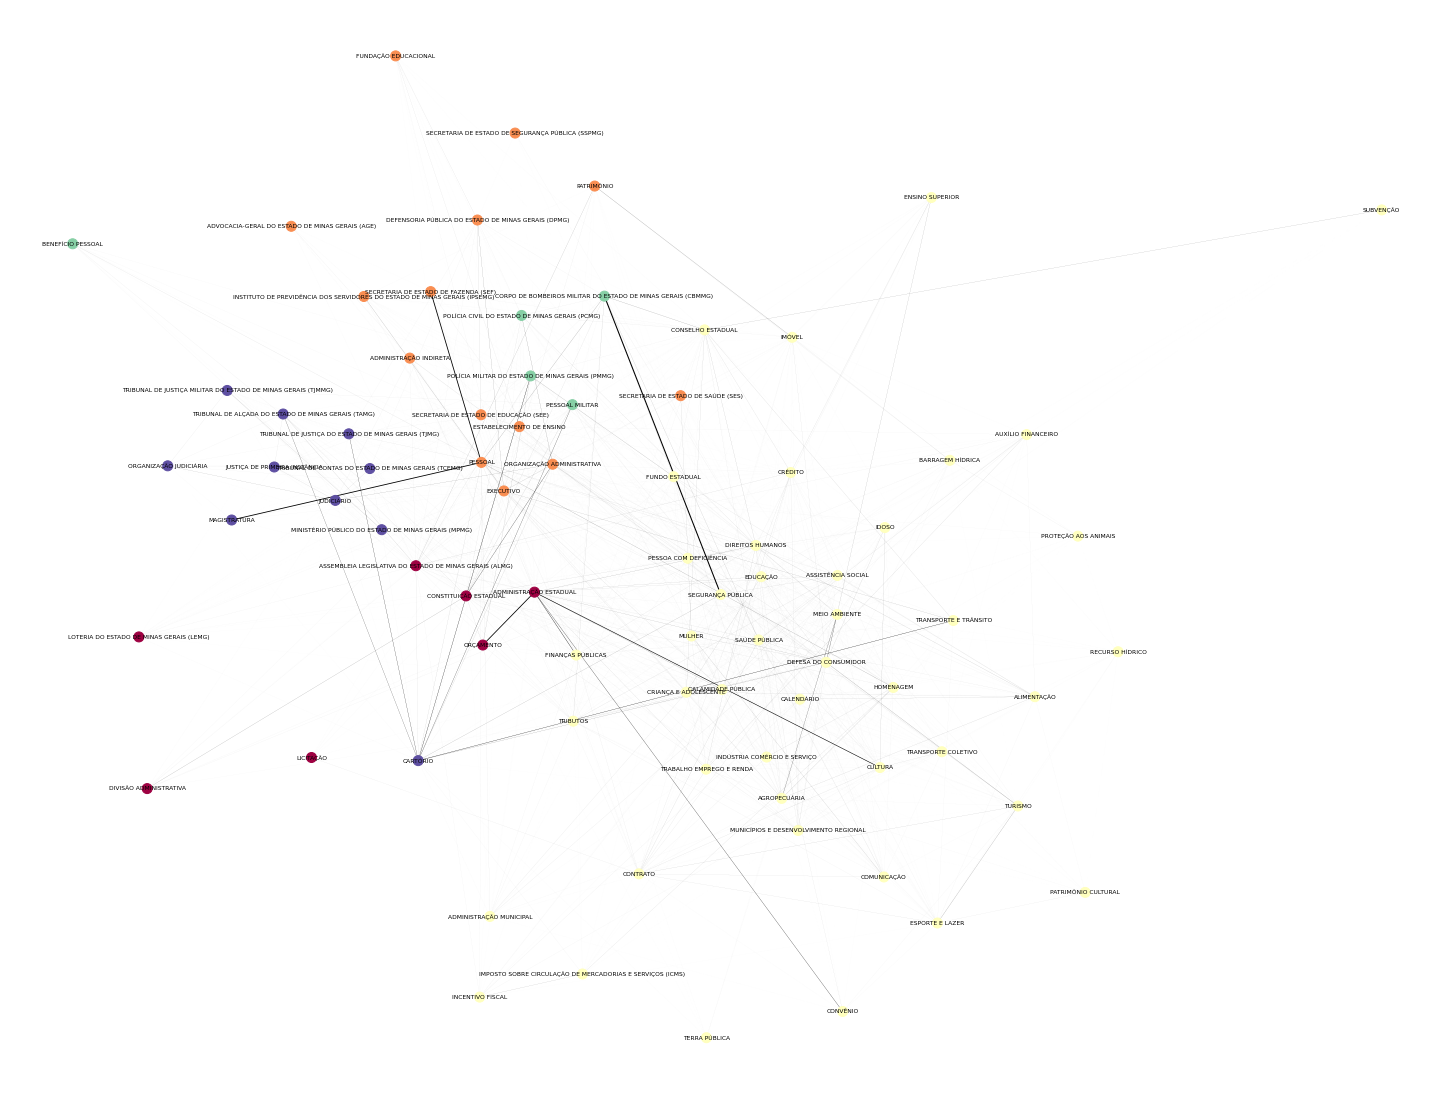

In [18]:
nx.draw(
    clusterer.graph_,
    pos=nx.spring_layout(clusterer.graph_, iterations=100),
    labels=names_dict,
    with_labels = True,
    width = [20*w/y.shape[0] for w in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y.shape[1])],
    cmap=plt.cm.Spectral,
    node_size=100,
    font_size=6
)